In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [6]:
egfd=pd.read_csv('final_working_data.csv')

In [7]:
pd.options.display.max_rows=100
pd.options.display.max_columns=100
egfd.drop('Unnamed: 0',axis=1,inplace=True)
egfd.head()

,api,reported_fluid_type,lease_name,well_num,1_mo_oil,1_mo_gas,2_mo_oil,2_mo_gas,cum_oil,cum_gas,formation,top_d,btm_d,operator,basin,td,tvd,elevation,spud_date,surf_lat,surf_long,btm_lat,btm_long,total_prop,total_fluid_pumped,stages_2,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time
0,4.201330e+13,O,PEELER RANCH,12H,2198,1605,2543,818,75414,47684,EAGLE FORD,9550,14062,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14220,9636,293.0,1/25/2010,28.729428,-98.447550,28.718943,-98.437972,3101450,0,25.0,730.209281,4901.567547,1356.940713,70.383333,73644,10.6
1,4.201330e+13,O,PEELER RANCH,11H,1240,1497,1495,570,47411,40364,EAGLE FORD,9626,14050,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14210,9661,264.0,12/13/2009,28.726453,-98.450193,28.715883,-98.440382,3662200,0,28.0,1207.258065,4972.457159,1356.940713,70.383333,73644,10.6
2,4.201340e+13,O,PEELER RANCH,14H,19526,8598,20930,9520,116128,63181,EAGLE FORD,9841,18624,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),18680,9951,315.0,12/3/2018,28.700189,-98.458870,28.678514,-98.444914,16340000,364984,3.0,440.335962,9082.269424,394.989008,70.383333,73644,10.6
3,4.201340e+13,O,PEELER RANCH,13H,20031,10254,20589,10888,107069,61288,EAGLE FORD,9932,18577,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),18633,9964,288.0,12/2/2018,28.700192,-98.458775,28.679222,-98.443981,16598000,374993,1.0,511.906545,8997.104398,394.989008,70.383333,73644,10.6
4,4.201330e+13,O,PEELER RANCH,8H,24150,15437,17070,9952,207210,144900,EAGLE FORD,10100,14569,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14650,10030,373.0,2/21/2013,28.675300,-98.470433,28.662717,-98.463747,6802000,116566,1.0,639.213250,5065.226757,252.731707,70.383333,73644,10.6


In [8]:
egfd.drop('stages_2',axis=1,inplace=True)

In [9]:
#creating the target variable - 60 day average oil rate
egfd['60day_oil_rate']=(egfd['1_mo_oil']+egfd['2_mo_oil'])/60

In [10]:
#how does production vary?
egfd['60day_oil_rate'].describe()

count    5121.000000
mean      605.098119
std       327.986927
min         9.583333
25%       378.883333
50%       541.166667
75%       755.783333
max      2949.116667
Name: 60day_oil_rate, dtype: float64

In [11]:
egfd['spud_date']=pd.to_datetime(egfd.spud_date)

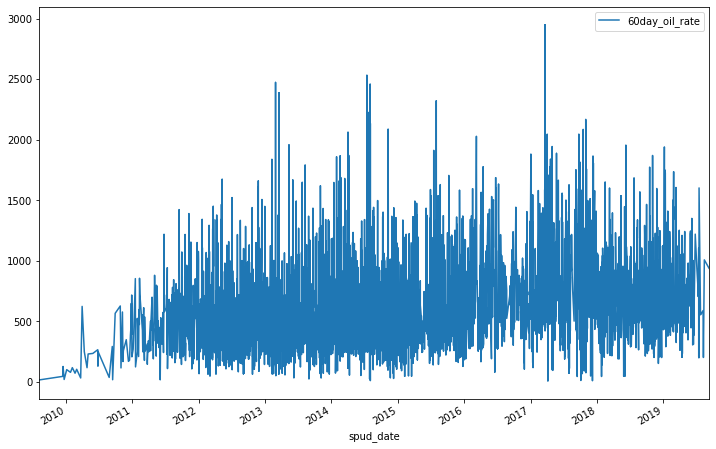

In [12]:
#is production related to time (EG. has production improved over time....maybe a little???...yikes)
egfd.plot(x='spud_date',y='60day_oil_rate',figsize=(12,8))


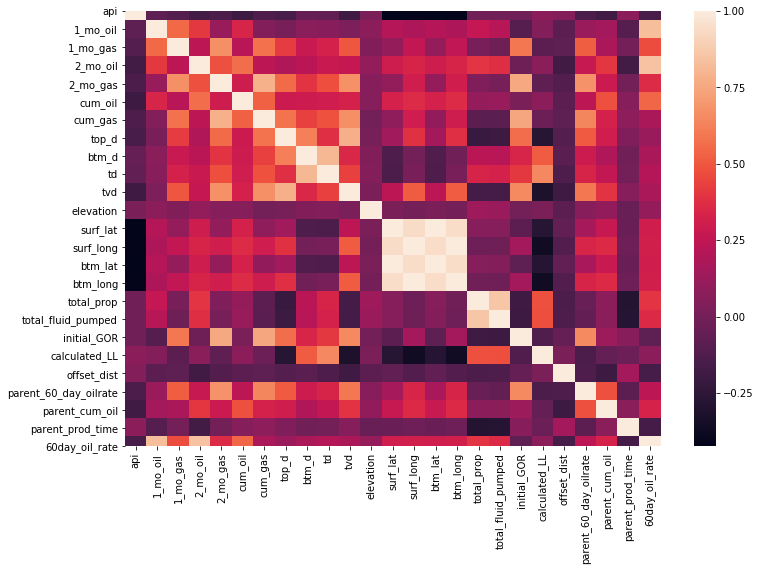

In [13]:
#what is correlated to each other?
egfd_corr=egfd.corr();
plt.subplots(figsize=(12,8))
sns.heatmap(egfd_corr);


In [14]:
egfd_corr

,api,1_mo_oil,1_mo_gas,2_mo_oil,2_mo_gas,cum_oil,cum_gas,top_d,btm_d,td,tvd,elevation,surf_lat,surf_long,btm_lat,btm_long,total_prop,total_fluid_pumped,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,60day_oil_rate
api,1.000000,-0.076470,-0.110242,-0.171543,-0.135826,-0.197498,-0.128999,-0.148932,-0.046907,-0.064280,-0.187420,0.024702,-0.421333,-0.415385,-0.423163,-0.414526,-0.007735,-0.008292,-0.017237,0.081466,0.052518,-0.138665,-0.180785,0.080661,-0.148811
1_mo_oil,-0.076470,1.000000,0.552777,0.406893,0.120141,0.340333,0.046127,0.012538,0.069880,0.064114,0.030776,0.081404,0.213254,0.186555,0.211291,0.186761,0.265212,0.220617,-0.104357,0.050702,-0.083080,0.123045,0.152651,-0.101177,0.832626
1_mo_gas,-0.110242,0.552777,1.000000,0.243171,0.667401,0.225835,0.577410,0.418159,0.280902,0.324903,0.497550,0.043097,0.107217,0.255382,0.109644,0.252367,0.015451,-0.025336,0.596329,-0.081418,-0.075450,0.519661,0.182396,0.003590,0.471321
2_mo_oil,-0.171543,0.406893,0.243171,1.000000,0.480033,0.561209,0.241079,0.196826,0.231186,0.280496,0.268113,0.102993,0.298824,0.334992,0.299441,0.334073,0.396528,0.376206,-0.023568,0.070610,-0.178095,0.276289,0.400143,-0.170090,0.844705
2_mo_gas,-0.135826,0.120141,0.667401,0.480033,1.000000,0.294846,0.785555,0.558077,0.393274,0.473651,0.673886,0.057300,0.102995,0.309007,0.106573,0.305688,0.036019,0.005865,0.752186,-0.067947,-0.112962,0.679326,0.287596,-0.003659,0.361435
cum_oil,-0.197498,0.340333,0.225835,0.561209,0.294846,1.000000,0.522921,0.286438,0.289105,0.302393,0.322219,0.056401,0.321895,0.366115,0.323037,0.364716,0.108833,0.117082,0.024036,0.075004,-0.078833,0.243327,0.482907,0.056345,0.539669
cum_gas,-0.128999,0.046127,0.577410,0.241079,0.785555,0.522921,1.000000,0.582005,0.428112,0.488265,0.670629,-0.002152,0.092242,0.299746,0.096267,0.296127,-0.081390,-0.088569,0.745965,-0.033160,-0.074473,0.640800,0.326916,0.085731,0.173192
top_d,-0.148932,0.012538,0.418159,0.196826,0.558077,0.286438,0.582005,1.000000,0.621395,0.382842,0.780551,0.006519,0.145895,0.388450,0.156064,0.382116,-0.206975,-0.198386,0.563360,-0.274794,-0.106568,0.507593,0.307177,0.033074,0.126681
btm_d,-0.046907,0.069880,0.280902,0.231186,0.393274,0.289105,0.428112,0.621395,1.000000,0.809518,0.350957,0.039355,-0.129678,-0.004743,-0.123899,-0.008258,0.229574,0.224252,0.343882,0.515823,-0.085576,0.289529,0.198843,-0.016915,0.181112
td,-0.064280,0.064114,0.324903,0.280496,0.473651,0.302393,0.488265,0.382842,0.809518,1.000000,0.438455,0.051216,-0.136862,0.015184,-0.131498,0.011926,0.335411,0.325585,0.408013,0.648236,-0.131410,0.335088,0.256350,-0.004928,0.207629


Interestingly, oil rate seems inversely correlated to parent prod time (not surprising) but positivity correlated with parent cum, which is confusing. Not what I'm used to. There is no relationship to lateral length, which really doesn't make sense to me.


In [15]:
egfd.groupby('operator')['60day_oil_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
operator,,,,,,,,
1836 RESOURCES LLC,3.0,563.338889,67.665766,488.883333,534.466667,580.050000,600.566667,621.083333
ABRAXAS PETROLEUM CORP,1.0,256.366667,NaN,256.366667,256.366667,256.366667,256.366667,256.366667
ARGENT ENERGY US HOLDINGS INC,2.0,235.408333,34.353604,211.116667,223.262500,235.408333,247.554167,259.700000
ATLAS EAGLE FORD OPERATING CO LLC,16.0,301.818750,184.512216,9.816667,233.400000,290.091667,337.591667,678.650000
AURORA RESOURCES CORP,1.0,312.000000,NaN,312.000000,312.000000,312.000000,312.000000,312.000000
AURORA USA DEVELOPMENT LLC,8.0,202.464583,78.821252,82.416667,151.241667,207.675000,246.658333,307.916667
BAYTEX USA DEVELOPMENT LLC,3.0,337.083333,112.077612,207.683333,303.850000,400.016667,401.783333,403.550000
BHP BILLITON PETROLEUM(TXLA OP) CO,146.0,352.246347,175.257869,32.633333,258.354167,331.425000,445.795833,763.916667
BLACKBRUSH OIL & GAS LLC,10.0,488.968333,357.360151,199.533333,237.695833,360.825000,621.329167,1282.233333


In [16]:
egfd.operator.value_counts()

EOG RESOURCES INC                         1301
MARATHON OIL EF LLC                       1061
DEVON ENERGY PRODUCTION CO LP              452
BURLINGTON RESOURCES O&G CO LP             408
PIONEER NATURAL RESOURCES USA INC          329
MURPHY EXPLORATION & PRODUCTION CO-USA     193
CHESAPEAKE OPERATING LLC                   149
BHP BILLITON PETROLEUM(TXLA OP) CO         146
ENCANA OIL & GAS (USA) INC                 139
GEOSOUTHERN ENERGY CORP                    101
CHESAPEAKE OPERATING INC                    97
COMSTOCK OIL & GAS LP                       68
PLAINS EXPLORATION & PRODUCTION CO          62
PENN VIRGINIA OIL & GAS LP                  59
SEA EAGLE FORD LLC                          59
TALISMAN ENERGY USA INC                     56
FREEPORT-MCMORAN OIL & GAS LLC              44
CARRIZO EAGLE FORD LLC                      40
SWIFT ENERGY OPERATING LLC                  35
STATOIL TEXAS ONSHORE PROPERTY LLC          29
ROSETTA RESOURCES OPERATING LP              20
ATLAS EAGLE F

There are only a few operators who operate a large chunk of the wells. I want to see who is the most prolific operator

In [17]:
op_short_list=egfd.groupby('operator').filter(lambda operator: len(operator)>=300)
op_short_list.head()

,api,reported_fluid_type,lease_name,well_num,1_mo_oil,1_mo_gas,2_mo_oil,2_mo_gas,cum_oil,cum_gas,formation,top_d,btm_d,operator,basin,td,tvd,elevation,spud_date,surf_lat,surf_long,btm_lat,btm_long,total_prop,total_fluid_pumped,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,60day_oil_rate
0,4.201330e+13,O,PEELER RANCH,12H,2198,1605,2543,818,75414,47684,EAGLE FORD,9550,14062,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14220,9636,293.0,2010-01-25,28.729428,-98.447550,28.718943,-98.437972,3101450,0,730.209281,4901.567547,1356.940713,70.383333,73644,10.6,79.016667
1,4.201330e+13,O,PEELER RANCH,11H,1240,1497,1495,570,47411,40364,EAGLE FORD,9626,14050,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14210,9661,264.0,2009-12-13,28.726453,-98.450193,28.715883,-98.440382,3662200,0,1207.258065,4972.457159,1356.940713,70.383333,73644,10.6,45.583333
2,4.201340e+13,O,PEELER RANCH,14H,19526,8598,20930,9520,116128,63181,EAGLE FORD,9841,18624,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),18680,9951,315.0,2018-12-03,28.700189,-98.458870,28.678514,-98.444914,16340000,364984,440.335962,9082.269424,394.989008,70.383333,73644,10.6,674.266667
3,4.201340e+13,O,PEELER RANCH,13H,20031,10254,20589,10888,107069,61288,EAGLE FORD,9932,18577,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),18633,9964,288.0,2018-12-02,28.700192,-98.458775,28.679222,-98.443981,16598000,374993,511.906545,8997.104398,394.989008,70.383333,73644,10.6,677.000000
4,4.201330e+13,O,PEELER RANCH,8H,24150,15437,17070,9952,207210,144900,EAGLE FORD,10100,14569,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14650,10030,373.0,2013-02-21,28.675300,-98.470433,28.662717,-98.463747,6802000,116566,639.213250,5065.226757,252.731707,70.383333,73644,10.6,687.000000


Text(0, 0.5, '60 Day Average Oil Rate')

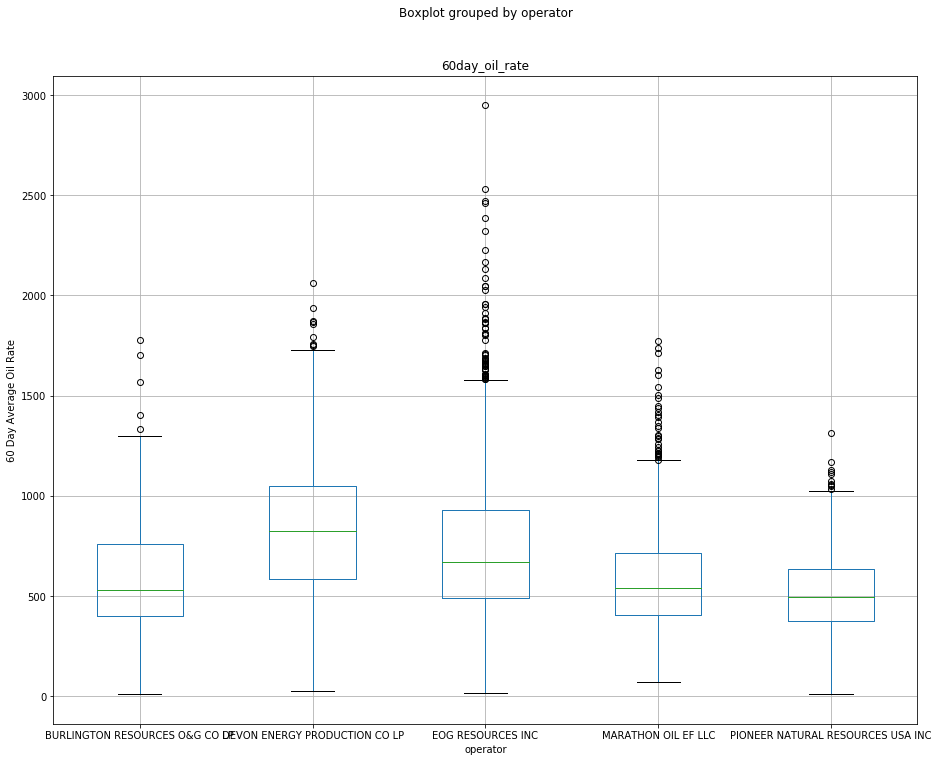

In [18]:
op_short_list.boxplot(column='60day_oil_rate',by='operator',figsize=(15,12));
plt.ylabel('60 Day Average Oil Rate')

In [19]:
op_short_list.groupby('operator')['60day_oil_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
operator,,,,,,,,
BURLINGTON RESOURCES O&G CO LP,408.0,591.470466,283.852960,9.583333,401.583333,527.966667,761.158333,1776.733333
DEVON ENERGY PRODUCTION CO LP,452.0,846.880715,353.679446,24.983333,583.812500,822.708333,1049.716667,2060.583333
EOG RESOURCES INC,1301.0,747.500679,390.049469,16.566667,492.833333,667.800000,927.900000,2949.116667
MARATHON OIL EF LLC,1061.0,587.196214,248.422095,69.116667,407.083333,542.033333,715.366667,1773.233333
PIONEER NATURAL RESOURCES USA INC,329.0,526.777913,213.755849,11.516667,374.666667,497.416667,634.150000,1315.366667


DVN Energy appears to have the best performing wells, although their dataset is significantly smaller than the EOG dataset and MRO

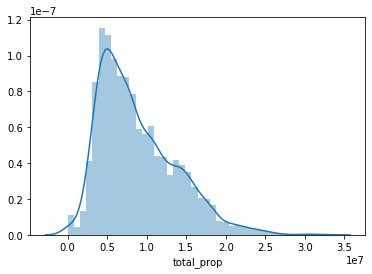

In [20]:
sns.distplot(egfd['total_prop'])

Creating a Prop/Ft  and fluid/ft column to normalize completion size by Lateral Length

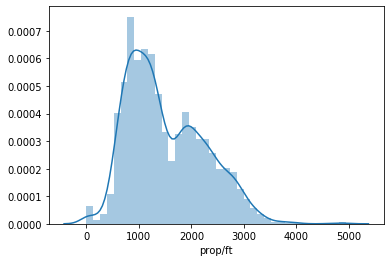

In [21]:
egfd['prop/ft']=egfd['total_prop']/egfd['calculated_LL']
egfd['fluid/ft']=egfd['total_fluid_pumped']/egfd['calculated_LL']
sns.distplot(egfd['prop/ft'])


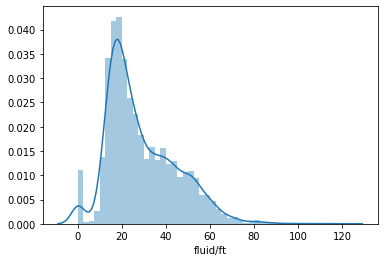

In [22]:
sns.distplot(egfd['fluid/ft'])

Text(0, 0.5, 'Prop/Ft')

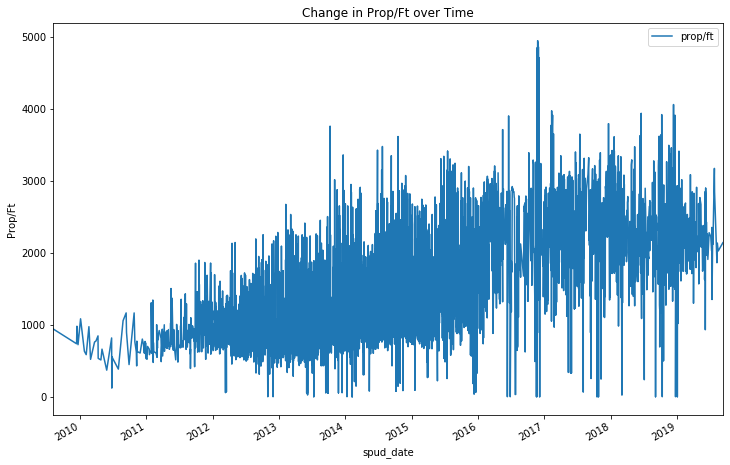

In [23]:
egfd.plot(x='spud_date',y='prop/ft',figsize=(12,8),title='Change in Prop/Ft over Time')
plt.ylabel('Prop/Ft')

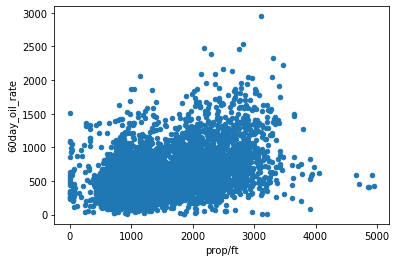

In [24]:
egfd.plot(kind='scatter',x='prop/ft',y='60day_oil_rate')

In [25]:
egfd_comp_corr=egfd[['prop/ft','fluid/ft','60day_oil_rate']].corr()
egfd_comp_corr

,prop/ft,fluid/ft,60day_oil_rate
prop/ft,1.000000,0.810382,0.415666
fluid/ft,0.810382,1.000000,0.373589
60day_oil_rate,0.415666,0.373589,1.000000


Final Thoughts: The lateral length calculation isn't perfect, but I think the final adjustment to completion size using lateral length is telling me that it is pretty close. I'm confused/concerned about the positive correlation between infill well performance and parent well cum volume. In my experience, this has created a very large impact to well performance (negatively), but the EGFD is a beast of its own and this may not be the case. I'll follow up with some of my coworkers and see if they have noticed something similar. 

Next steps: Identify which features are most important. Right now, it looks like completion volume, parent well performance, and depth data are important. Location also seems important, so I'm wondering if I should consolidate that into one column, such as lateral midpoint, for modeling purposes. After that, hopefully I can get to modeling! 

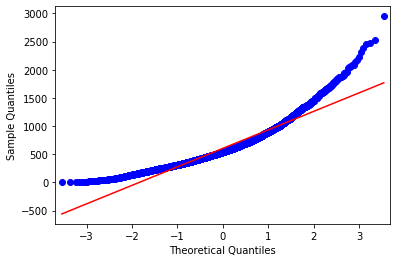

In [26]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(egfd['60day_oil_rate'], line='s')
pyplot.show()

In [27]:
#it does not appear that the target variable is normal in this instance
from scipy.stats import normaltest
stat, p = normaltest(egfd['60day_oil_rate'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1305.637, p=0.000


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

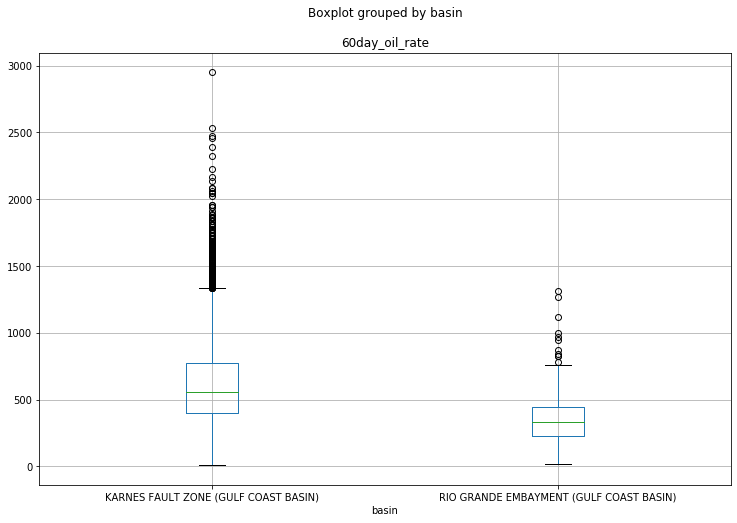

In [29]:
#I'm thinking that I need to model the two basins separately since they perform so differently. I'm going to check to see how different they are
egfd.boxplot(column='60day_oil_rate',by='basin',figsize=(12,8))

In [30]:
egfd_karnes=egfd[egfd.basin=='KARNES FAULT ZONE (GULF COAST BASIN)']
print(egfd_karnes.shape)
egfd_rio=egfd[egfd.basin!='KARNES FAULT ZONE (GULF COAST BASIN)']
print(egfd_rio.shape)

(4799, 34)
(322, 34)


Given that the Karnes dataset is so much bigger, i'll probably just Model it first, and then come back to the Rio Grande Embayment

Karnes Mean: 621.5308883795246
Rio Mean: 360.18861283643895


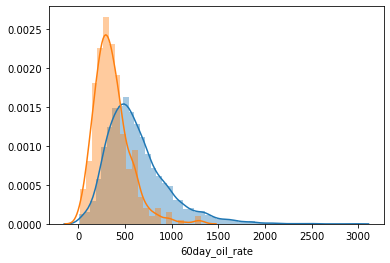

In [31]:
sns.distplot(egfd_karnes['60day_oil_rate'])
sns.distplot(egfd_rio['60day_oil_rate'])
print('Karnes Mean:',egfd_karnes['60day_oil_rate'].mean())
print('Rio Mean:',egfd_rio['60day_oil_rate'].mean())

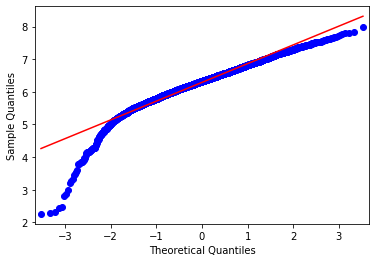

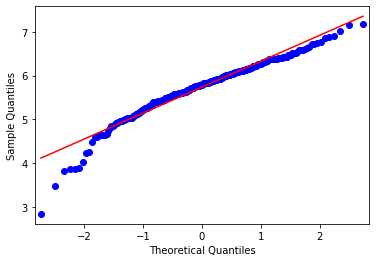

In [32]:
qqplot(np.log(egfd_karnes['60day_oil_rate']), line='s')
qqplot(np.log(egfd_rio['60day_oil_rate']), line='s')

pyplot.show()


In [33]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(egfd_karnes['60day_oil_rate'], egfd_rio['60day_oil_rate'])
print(fvalue, pvalue)


198.99210329389987 2.326798022263127e-44


The resulting Pvalue is less than alpha=.05 (95% confidence interval) and so I'm fairly sure these datasets are statistically different enough to merit mapping to a 0 or 1

In [34]:
#predict the mean of 60 day oil rate as a basis for predicting performance
egfd['mean_predict']=egfd['60day_oil_rate'].mean()
egfd.head()

,api,reported_fluid_type,lease_name,well_num,1_mo_oil,1_mo_gas,2_mo_oil,2_mo_gas,cum_oil,cum_gas,formation,top_d,btm_d,operator,basin,td,tvd,elevation,spud_date,surf_lat,surf_long,btm_lat,btm_long,total_prop,total_fluid_pumped,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,60day_oil_rate,prop/ft,fluid/ft,mean_predict
0,4.201330e+13,O,PEELER RANCH,12H,2198,1605,2543,818,75414,47684,EAGLE FORD,9550,14062,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14220,9636,293.0,2010-01-25,28.729428,-98.447550,28.718943,-98.437972,3101450,0,730.209281,4901.567547,1356.940713,70.383333,73644,10.6,79.016667,632.746559,0.000000,605.098119
1,4.201330e+13,O,PEELER RANCH,11H,1240,1497,1495,570,47411,40364,EAGLE FORD,9626,14050,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14210,9661,264.0,2009-12-13,28.726453,-98.450193,28.715883,-98.440382,3662200,0,1207.258065,4972.457159,1356.940713,70.383333,73644,10.6,45.583333,736.497044,0.000000,605.098119
2,4.201340e+13,O,PEELER RANCH,14H,19526,8598,20930,9520,116128,63181,EAGLE FORD,9841,18624,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),18680,9951,315.0,2018-12-03,28.700189,-98.458870,28.678514,-98.444914,16340000,364984,440.335962,9082.269424,394.989008,70.383333,73644,10.6,674.266667,1799.109808,40.186432,605.098119
3,4.201340e+13,O,PEELER RANCH,13H,20031,10254,20589,10888,107069,61288,EAGLE FORD,9932,18577,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),18633,9964,288.0,2018-12-02,28.700192,-98.458775,28.679222,-98.443981,16598000,374993,511.906545,8997.104398,394.989008,70.383333,73644,10.6,677.000000,1844.815761,41.679299,605.098119
4,4.201330e+13,O,PEELER RANCH,8H,24150,15437,17070,9952,207210,144900,EAGLE FORD,10100,14569,EOG RESOURCES INC,KARNES FAULT ZONE (GULF COAST BASIN),14650,10030,373.0,2013-02-21,28.675300,-98.470433,28.662717,-98.463747,6802000,116566,639.213250,5065.226757,252.731707,70.383333,73644,10.6,687.000000,1342.881637,23.012987,605.098119


In [35]:
egfd['basin']=egfd.basin.map({'KARNES FAULT ZONE (GULF COAST BASIN)':1, 'RIO GRANDE EMBAYMENT (GULF COAST BASIN)':0})
egfd.head()

,api,reported_fluid_type,lease_name,well_num,1_mo_oil,1_mo_gas,2_mo_oil,2_mo_gas,cum_oil,cum_gas,formation,top_d,btm_d,operator,basin,td,tvd,elevation,spud_date,surf_lat,surf_long,btm_lat,btm_long,total_prop,total_fluid_pumped,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,60day_oil_rate,prop/ft,fluid/ft,mean_predict
0,4.201330e+13,O,PEELER RANCH,12H,2198,1605,2543,818,75414,47684,EAGLE FORD,9550,14062,EOG RESOURCES INC,1,14220,9636,293.0,2010-01-25,28.729428,-98.447550,28.718943,-98.437972,3101450,0,730.209281,4901.567547,1356.940713,70.383333,73644,10.6,79.016667,632.746559,0.000000,605.098119
1,4.201330e+13,O,PEELER RANCH,11H,1240,1497,1495,570,47411,40364,EAGLE FORD,9626,14050,EOG RESOURCES INC,1,14210,9661,264.0,2009-12-13,28.726453,-98.450193,28.715883,-98.440382,3662200,0,1207.258065,4972.457159,1356.940713,70.383333,73644,10.6,45.583333,736.497044,0.000000,605.098119
2,4.201340e+13,O,PEELER RANCH,14H,19526,8598,20930,9520,116128,63181,EAGLE FORD,9841,18624,EOG RESOURCES INC,1,18680,9951,315.0,2018-12-03,28.700189,-98.458870,28.678514,-98.444914,16340000,364984,440.335962,9082.269424,394.989008,70.383333,73644,10.6,674.266667,1799.109808,40.186432,605.098119
3,4.201340e+13,O,PEELER RANCH,13H,20031,10254,20589,10888,107069,61288,EAGLE FORD,9932,18577,EOG RESOURCES INC,1,18633,9964,288.0,2018-12-02,28.700192,-98.458775,28.679222,-98.443981,16598000,374993,511.906545,8997.104398,394.989008,70.383333,73644,10.6,677.000000,1844.815761,41.679299,605.098119
4,4.201330e+13,O,PEELER RANCH,8H,24150,15437,17070,9952,207210,144900,EAGLE FORD,10100,14569,EOG RESOURCES INC,1,14650,10030,373.0,2013-02-21,28.675300,-98.470433,28.662717,-98.463747,6802000,116566,639.213250,5065.226757,252.731707,70.383333,73644,10.6,687.000000,1342.881637,23.012987,605.098119


In [36]:
egfd.basin.value_counts()

1    4799
0     322
Name: basin, dtype: int64

In [37]:
from sklearn.metrics import mean_squared_error
#calculating the RMSE of the mean relative to actuals
np.sqrt(mean_squared_error(egfd['60day_oil_rate'],egfd['mean_predict']))

327.9549014746769

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#basically all possible features
feature_cols=['initial_GOR', 'calculated_LL', 'offset_dist', 'parent_60_day_oilrate', 'parent_cum_oil', 'parent_prod_time',
             'prop/ft', 'fluid/ft','basin']
X=egfd[feature_cols]
y=egfd['60day_oil_rate']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#instantiate the model
lr=LinearRegression()
lr.fit(X_train,y_train)

egfd['y_pred']=lr.predict(X)
y_pred_test=lr.predict(X_test)
print('Total Dataset RMSE:',np.sqrt(mean_squared_error(egfd['60day_oil_rate'], egfd['y_pred'])))
print('Test Dataset RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Total Dataset RMSE: 272.5466385493305
Test Dataset RMSE: 273.67260663354523


In [39]:

print("Training Score:",lr.score(X_train,y_train))
print('Test Score:',lr.score(X_test,y_test))
print('All Data Score:',lr.score(X,y))

Training Score: 0.32105302941738706
Test Score: 0.2710580080986083
All Data Score: 0.3093573283242411


In [40]:
#checking the assumptions required for LinearRegression
egfd_trim=egfd.drop(['api', 'reported_fluid_type', 'lease_name', 'well_num', '1_mo_oil', '1_mo_gas', '2_mo_oil', 
                      '2_mo_gas', 'cum_oil', 'cum_gas', 'formation', 'top_d', 'btm_d', 'operator', 'td', 
                      'tvd', 'elevation', 'spud_date', 'surf_lat', 'surf_long', 'btm_lat', 'btm_long', 'total_prop', 
                      'total_fluid_pumped'],axis=1)

In [41]:
egfd_trim.head()

,basin,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,60day_oil_rate,prop/ft,fluid/ft,mean_predict,y_pred
0,1,730.209281,4901.567547,1356.940713,70.383333,73644,10.6,79.016667,632.746559,0.000000,605.098119,250.773084
1,1,1207.258065,4972.457159,1356.940713,70.383333,73644,10.6,45.583333,736.497044,0.000000,605.098119,245.402665
2,1,440.335962,9082.269424,394.989008,70.383333,73644,10.6,674.266667,1799.109808,40.186432,605.098119,602.618753
3,1,511.906545,8997.104398,394.989008,70.383333,73644,10.6,677.000000,1844.815761,41.679299,605.098119,605.008714
4,1,639.213250,5065.226757,252.731707,70.383333,73644,10.6,687.000000,1342.881637,23.012987,605.098119,413.264839


In [42]:
cols=[egfd_trim.columns.to_list()]
cols

[['basin',
  'initial_GOR',
  'calculated_LL',
  'offset_dist',
  'parent_60_day_oilrate',
  'parent_cum_oil',
  'parent_prod_time',
  '60day_oil_rate',
  'prop/ft',
  'fluid/ft',
  'mean_predict',
  'y_pred']]

In [43]:
cols=['60day_oil_rate','basin',
  'initial_GOR',
  'calculated_LL',
  'offset_dist',
  'parent_60_day_oilrate',
  'parent_cum_oil',
  'parent_prod_time','prop/ft',
  'fluid/ft',
  'mean_predict',
  'y_pred' ]
egfd_trim=egfd_trim[cols]
egfd_trim.head()

,60day_oil_rate,basin,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,prop/ft,fluid/ft,mean_predict,y_pred
0,79.016667,1,730.209281,4901.567547,1356.940713,70.383333,73644,10.6,632.746559,0.000000,605.098119,250.773084
1,45.583333,1,1207.258065,4972.457159,1356.940713,70.383333,73644,10.6,736.497044,0.000000,605.098119,245.402665
2,674.266667,1,440.335962,9082.269424,394.989008,70.383333,73644,10.6,1799.109808,40.186432,605.098119,602.618753
3,677.000000,1,511.906545,8997.104398,394.989008,70.383333,73644,10.6,1844.815761,41.679299,605.098119,605.008714
4,687.000000,1,639.213250,5065.226757,252.731707,70.383333,73644,10.6,1342.881637,23.012987,605.098119,413.264839


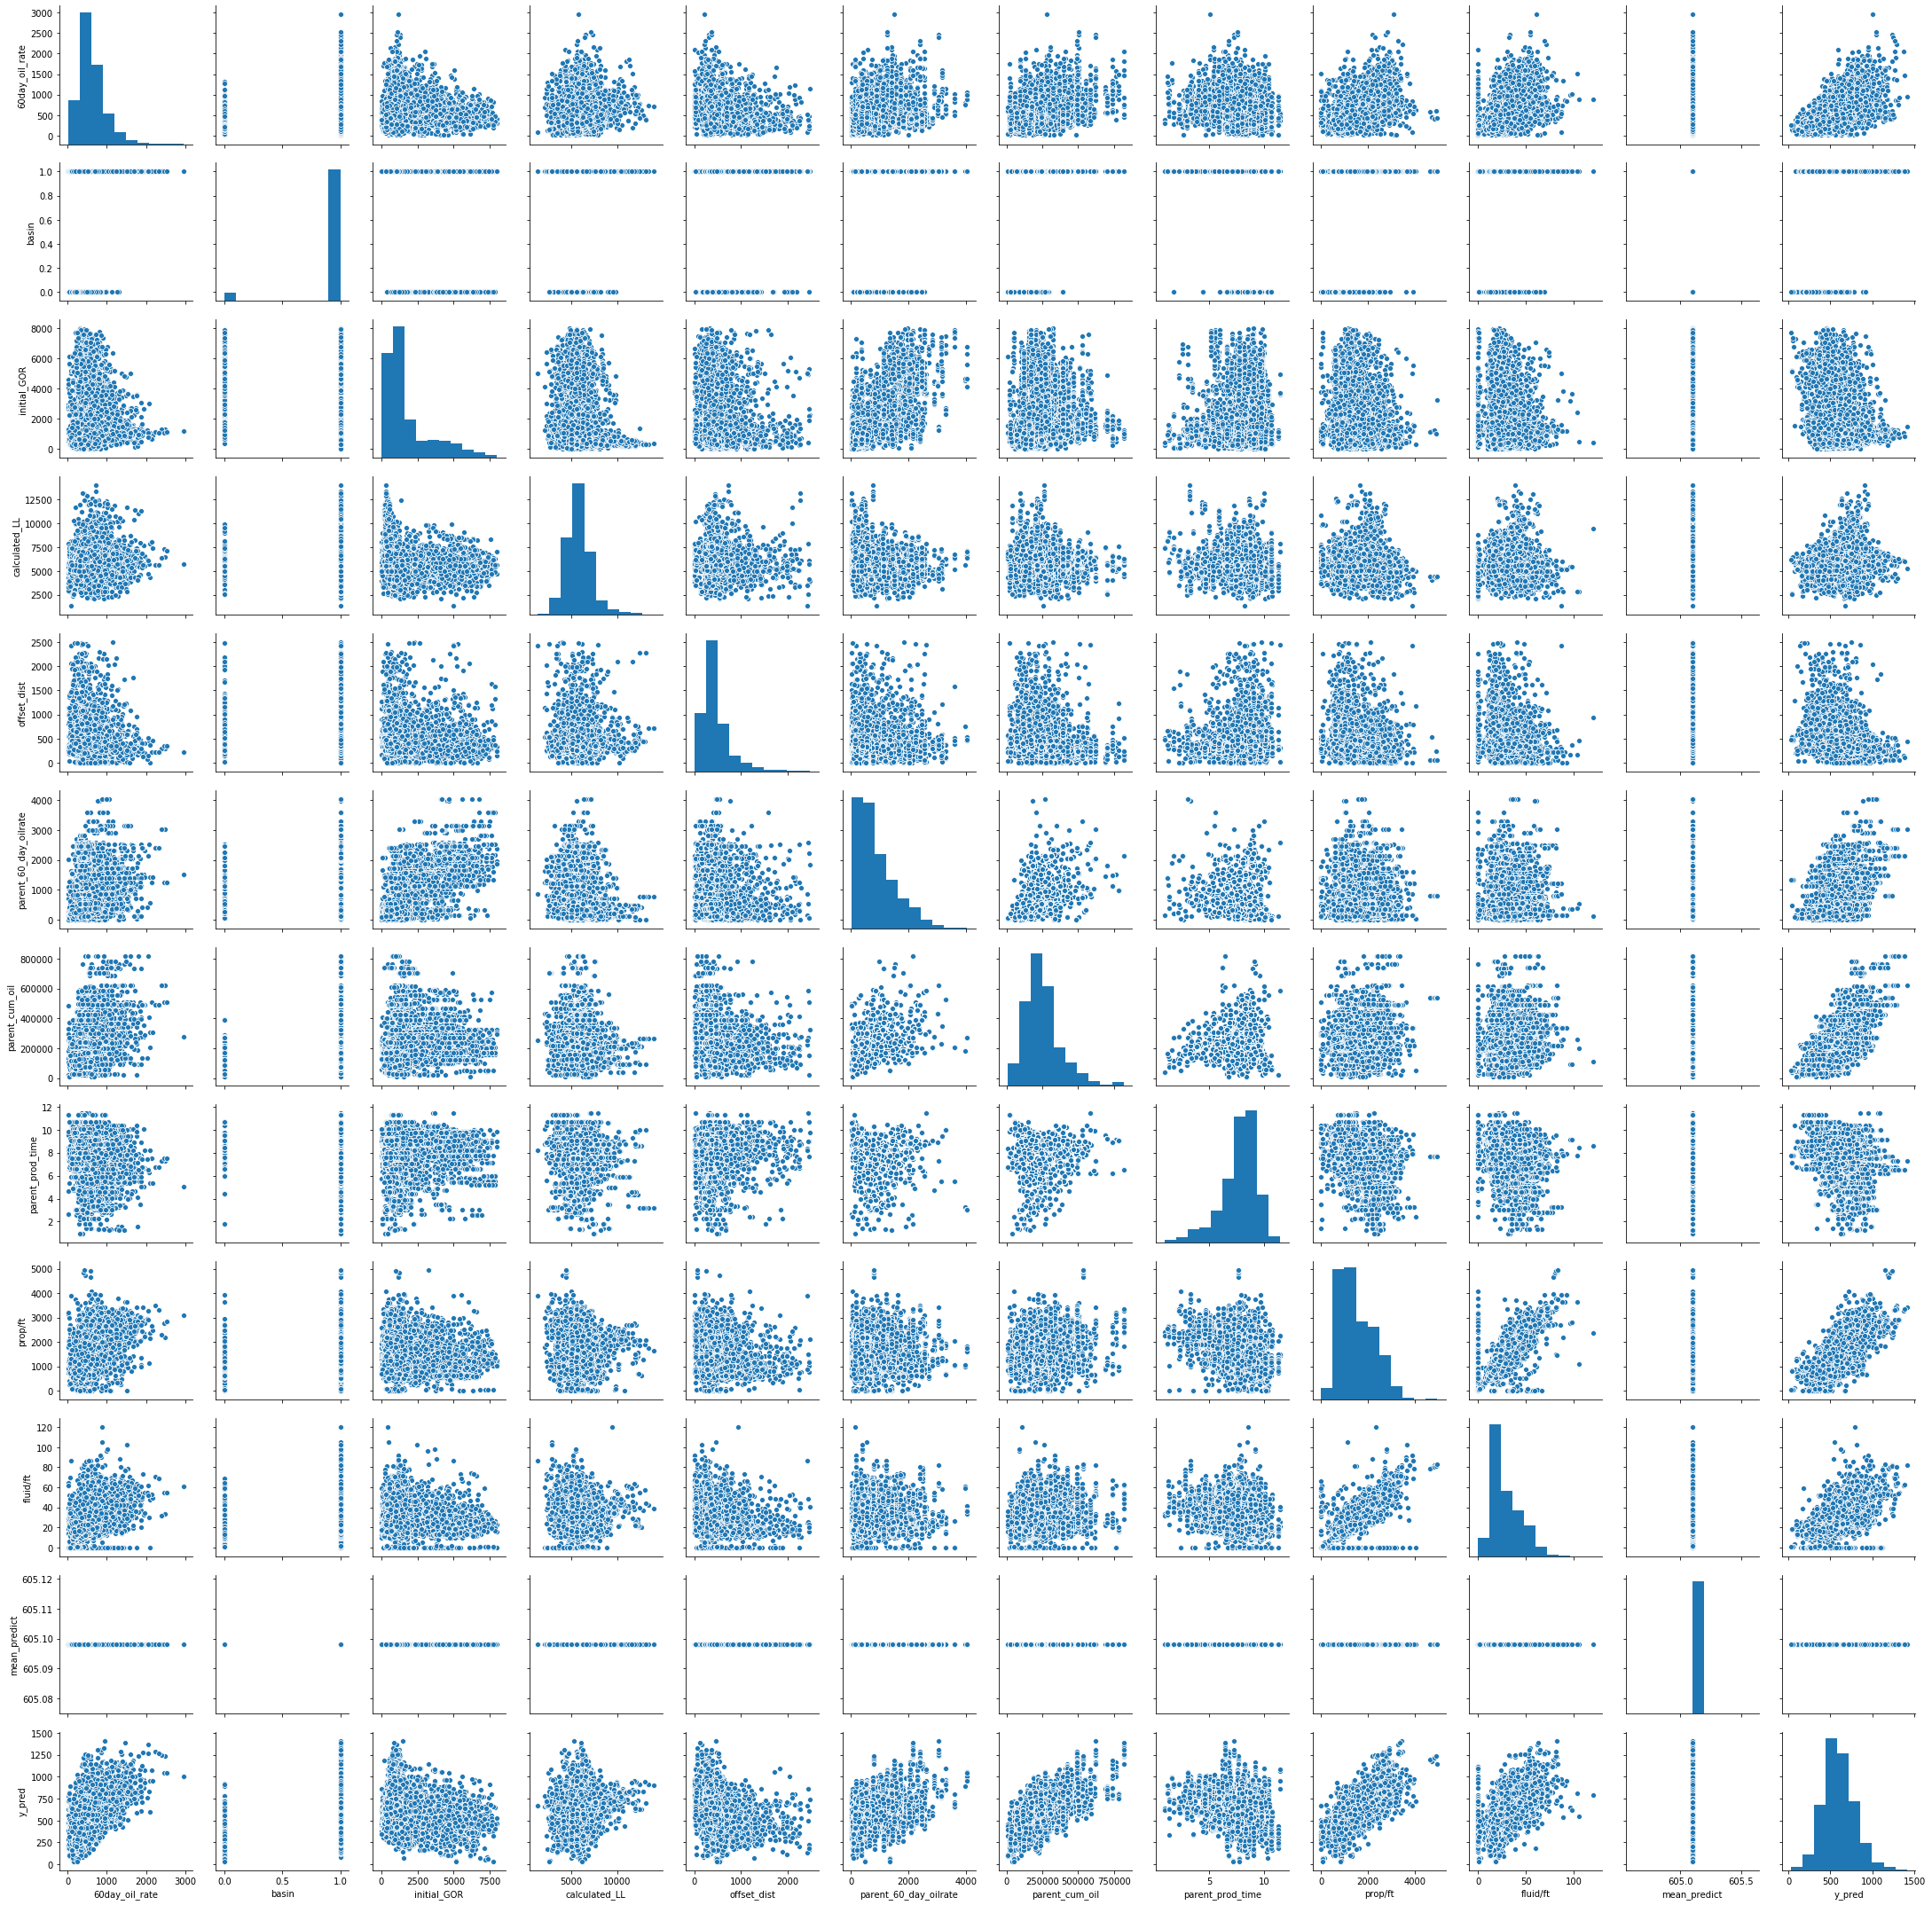

In [44]:
sns.pairplot(data=egfd_trim)

Much of the data is not normal in appearance. I may need to adjust the data so that things like proppant volume and fluid volume are normally distributed

In [45]:
egfd_corr=egfd_trim.corr()
egfd_corr

,60day_oil_rate,basin,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,prop/ft,fluid/ft,mean_predict,y_pred
60day_oil_rate,1.000000e+00,1.934390e-01,-7.543492e-02,7.251785e-02,-1.566569e-01,2.396079e-01,3.320474e-01,-1.624071e-01,4.156662e-01,3.735892e-01,3.879297e-15,5.564708e-01
basin,1.934390e-01,1.000000e+00,-2.718499e-01,-2.239467e-02,-1.209115e-01,-4.210267e-02,1.442967e-01,-9.254712e-02,1.731975e-01,1.328955e-01,-3.907345e-15,3.351607e-01
initial_GOR,-7.543492e-02,-2.718499e-01,1.000000e+00,-1.238546e-01,-5.027643e-02,6.547645e-01,1.292894e-01,6.185061e-02,-1.405763e-01,-1.530781e-01,3.386447e-16,-1.226995e-01
calculated_LL,7.251785e-02,-2.239467e-02,-1.238546e-01,1.000000e+00,2.188471e-02,-1.378203e-01,-5.538962e-02,-3.345465e-02,-1.477784e-02,1.800835e-02,-1.923408e-15,1.459210e-01
offset_dist,-1.566569e-01,-1.209115e-01,-5.027643e-02,2.188471e-02,1.000000e+00,-1.293925e-01,-1.940595e-01,1.535696e-01,-1.819470e-01,-1.750980e-01,9.494942e-16,-2.874427e-01
parent_60_day_oilrate,2.396079e-01,-4.210267e-02,6.547645e-01,-1.378203e-01,-1.293925e-01,1.000000e+00,4.785733e-01,-8.399744e-02,3.686679e-02,2.173625e-02,1.901360e-16,4.405892e-01
parent_cum_oil,3.320474e-01,1.442967e-01,1.292894e-01,-5.538962e-02,-1.940595e-01,4.785733e-01,1.000000e+00,7.028528e-02,1.337622e-01,1.352692e-01,-9.301239e-15,6.062748e-01
parent_prod_time,-1.624071e-01,-9.254712e-02,6.185061e-02,-3.345465e-02,1.535696e-01,-8.399744e-02,7.028528e-02,1.000000e+00,-3.115003e-01,-3.123894e-01,-1.964477e-14,-2.789869e-01
prop/ft,4.156662e-01,1.731975e-01,-1.405763e-01,-1.477784e-02,-1.819470e-01,3.686679e-02,1.337622e-01,-3.115003e-01,1.000000e+00,8.103822e-01,-3.088419e-15,7.389286e-01
fluid/ft,3.735892e-01,1.328955e-01,-1.530781e-01,1.800835e-02,-1.750980e-01,2.173625e-02,1.352692e-01,-3.123894e-01,8.103822e-01,1.000000e+00,-1.184686e-15,6.587403e-01


In [46]:
names_df=egfd_trim.drop(['60day_oil_rate','mean_predict','y_pred'],axis=1)
names=names_df.columns.to_list()
names

['basin',
 'initial_GOR',
 'calculated_LL',
 'offset_dist',
 'parent_60_day_oilrate',
 'parent_cum_oil',
 'parent_prod_time',
 'prop/ft',
 'fluid/ft']

In [47]:
import statsmodels.api as sm
for i in range(0,len(names)):
    y=names_df.loc[:,names_df.columns==names[i]]
    x=names_df.loc[:,names_df.columns!=names[i]]
    model=sm.OLS(y,x)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print('R Squared of column {} is {} keeping all other columns as features'.format(names[i],round(rsq,2)))
    print('VIF column {} is {} \n'.format(names[i],round(vif,2)))

R Squared of column basin is 0.93 keeping all other columns as features
VIF column basin is 13.88 

R Squared of column initial_GOR is 0.78 keeping all other columns as features
VIF column initial_GOR is 4.59 

R Squared of column calculated_LL is 0.92 keeping all other columns as features
VIF column calculated_LL is 13.09 

R Squared of column offset_dist is 0.67 keeping all other columns as features
VIF column offset_dist is 3.02 

R Squared of column parent_60_day_oilrate is 0.85 keeping all other columns as features
VIF column parent_60_day_oilrate is 6.79 

R Squared of column parent_cum_oil is 0.87 keeping all other columns as features
VIF column parent_cum_oil is 7.5 

R Squared of column parent_prod_time is 0.94 keeping all other columns as features
VIF column parent_prod_time is 16.73 

R Squared of column prop/ft is 0.93 keeping all other columns as features
VIF column prop/ft is 15.2 

R Squared of column fluid/ft is 0.92 keeping all other columns as features
VIF column flui

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [49]:
#looking to remove correlated features
#the two for loops here iterate through the range of features twice and compare each column to each other. This is how you would iterate twice through
correlated_features=set()
correlation_matrix=egfd_trim.drop(['60day_oil_rate','mean_predict','y_pred'],axis=1).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'fluid/ft'}


In [50]:
correlation_matrix

,basin,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,prop/ft,fluid/ft
basin,1.000000,-0.271850,-0.022395,-0.120912,-0.042103,0.144297,-0.092547,0.173198,0.132896
initial_GOR,-0.271850,1.000000,-0.123855,-0.050276,0.654764,0.129289,0.061851,-0.140576,-0.153078
calculated_LL,-0.022395,-0.123855,1.000000,0.021885,-0.137820,-0.055390,-0.033455,-0.014778,0.018008
offset_dist,-0.120912,-0.050276,0.021885,1.000000,-0.129393,-0.194060,0.153570,-0.181947,-0.175098
parent_60_day_oilrate,-0.042103,0.654764,-0.137820,-0.129393,1.000000,0.478573,-0.083997,0.036867,0.021736
parent_cum_oil,0.144297,0.129289,-0.055390,-0.194060,0.478573,1.000000,0.070285,0.133762,0.135269
parent_prod_time,-0.092547,0.061851,-0.033455,0.153570,-0.083997,0.070285,1.000000,-0.311500,-0.312389
prop/ft,0.173198,-0.140576,-0.014778,-0.181947,0.036867,0.133762,-0.311500,1.000000,0.810382
fluid/ft,0.132896,-0.153078,0.018008,-0.175098,0.021736,0.135269,-0.312389,0.810382,1.000000


I'm going to drop fluid/ft which is really unfortunate, but probably necessary. This usually happens in my experience. 

In [51]:
egfd_trim.drop('fluid/ft',axis=1,inplace=True)

In [52]:
egfd_trim.head()

,60day_oil_rate,basin,initial_GOR,calculated_LL,offset_dist,parent_60_day_oilrate,parent_cum_oil,parent_prod_time,prop/ft,mean_predict,y_pred
0,79.016667,1,730.209281,4901.567547,1356.940713,70.383333,73644,10.6,632.746559,605.098119,250.773084
1,45.583333,1,1207.258065,4972.457159,1356.940713,70.383333,73644,10.6,736.497044,605.098119,245.402665
2,674.266667,1,440.335962,9082.269424,394.989008,70.383333,73644,10.6,1799.109808,605.098119,602.618753
3,677.000000,1,511.906545,8997.104398,394.989008,70.383333,73644,10.6,1844.815761,605.098119,605.008714
4,687.000000,1,639.213250,5065.226757,252.731707,70.383333,73644,10.6,1342.881637,605.098119,413.264839


In [53]:
#basically all possible features
feature_cols=['initial_GOR', 'calculated_LL', 'offset_dist', 'parent_60_day_oilrate', 'parent_cum_oil', 'parent_prod_time',
             'prop/ft','basin']
X=egfd[feature_cols]
y=egfd['60day_oil_rate']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#instantiate the model
lr=LinearRegression()
lr.fit(X_train,y_train)

egfd['y_pred']=lr.predict(X)
y_pred_test=lr.predict(X_test)
print('Total Dataset RMSE:',np.sqrt(mean_squared_error(egfd['60day_oil_rate'], egfd['y_pred'])))
print('Test Dataset RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Total Dataset RMSE: 272.82232644125196
Test Dataset RMSE: 274.11613061255963


In [54]:
print("Training Score:",lr.score(X_train,y_train))
print('Test Score:',lr.score(X_test,y_test))
print('All Data Score:',lr.score(X,y))

Training Score: 0.3199581308347388
Test Score: 0.26869339268954984
All Data Score: 0.30795941623554757


In [55]:
feature_cols=['calculated_LL', 'offset_dist', 'parent_60_day_oilrate',
             'prop/ft','basin']
X=egfd[feature_cols]
y=egfd['60day_oil_rate']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#instantiate the model
linreg=LinearRegression()
linreg.fit(X_train,y_train)

egfd['y_pred']=linreg.predict(X)
y_pred_test=linreg.predict(X_test)
print('Total Dataset RMSE:',np.sqrt(mean_squared_error(egfd['60day_oil_rate'], egfd['y_pred'])))
print('Test Dataset RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Training Score:",linreg.score(X_train,y_train))
print('Test Score:',linreg.score(X_test,y_test))
print('All Data Score:',linreg.score(X,y))

Total Dataset RMSE: 282.968504511035
Test Dataset RMSE: 283.2250222741315
Training Score: 0.2665530257722254
Test Score: 0.2192831530597099
All Data Score: 0.25552872229802204


In [56]:
feature_cols=[ 'parent_60_day_oilrate',
             'prop/ft']
X=egfd[feature_cols]
y=egfd['60day_oil_rate']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#instantiate the model
linreg2=LinearRegression()
linreg2.fit(X_train,y_train)

egfd['y_pred']=linreg2.predict(X)
y_pred_test=linreg2.predict(X_test)
print('Total Dataset RMSE:',np.sqrt(mean_squared_error(egfd['60day_oil_rate'], egfd['y_pred'])))
print('Test Dataset RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Training Score:",linreg2.score(X_train,y_train))
print('Test Score:',linreg2.score(X_test,y_test))
print('All Data Score:',linreg2.score(X,y))

Total Dataset RMSE: 289.1049572017614
Test Dataset RMSE: 287.1192553998145
Training Score: 0.23043502946287686
Test Score: 0.19766645546475137
All Data Score: 0.22288941451093536


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000, bootstrap=True, oob_score=True, random_state=1)

In [70]:
feature_cols=['initial_GOR', 'calculated_LL', 'offset_dist', 'parent_60_day_oilrate', 'parent_cum_oil', 'parent_prod_time',
             'prop/ft','basin']
X=egfd[feature_cols]
y=egfd['60day_oil_rate']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
bagreg.fit(X_train, y_train)
egfd['y_pred'] = bagreg.predict(X)
print('Total Dataset RMSE:',np.sqrt(mean_squared_error(egfd['60day_oil_rate'], egfd['y_pred'])))
print('Test Dataset RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Test Score:',bagreg.score(X_test,y_test))

Total Dataset RMSE: 126.50979841085284
Test Dataset RMSE: 287.1192553998145
Test Score: 0.564507360282019


In [60]:
bagreg.oob_score_

0.39852731089344495

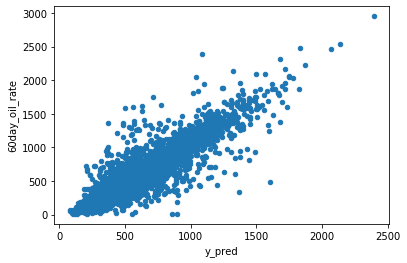

In [64]:
egfd.plot(kind='scatter',x='y_pred',y='60day_oil_rate')

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=500, max_features=4, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=1, verbose=0,
                      warm_start=False)

In [80]:
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
6,prop/ft,0.262467
3,parent_60_day_oilrate,0.164735
4,parent_cum_oil,0.142945
0,initial_GOR,0.127825
1,calculated_LL,0.122138
2,offset_dist,0.090525
5,parent_prod_time,0.078269
7,basin,0.011097


In [79]:
print('Test Score:',rfreg.score(X_test,y_test))

Test Score: 0.5714400039485523


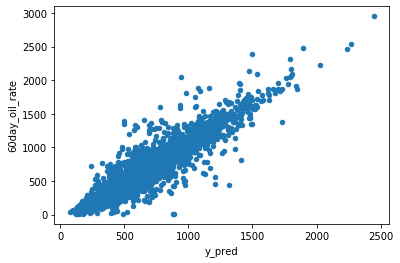

In [82]:
egfd['y_pred'] = rfreg.predict(X)
egfd.plot(kind='scatter',x='y_pred',y='60day_oil_rate')